# Capstone Study

In [29]:
import utils
import plots
%matplotlib inline

## Unormalized Data

We'll test the same classifiers on the raw data.

In [30]:
training_set = utils.load_training_set()

In [31]:
utils.percentage_missin(training_set)

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,NumberOfTime6089DaysPastDueNotWorse,DebtRatio,NumberOfDependents,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime3059DaysPastDueNotWorse,NumberOfTimes90DaysLate
% of missing,0,0,0,0,0,2,19,0,0,0,0


In [32]:
# There are a percentage of missing values we'll fill with 0's
training_set = training_set.fillna(0)
training_set.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [33]:
utils.percentage_missin(training)

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,NumberOfTime6089DaysPastDueNotWorse,DebtRatio,NumberOfDependents,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime3059DaysPastDueNotWorse,NumberOfTimes90DaysLate
% of missing,0,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn import preprocessing

y = training_set['SeriousDlqin2yrs'].as_matrix()
x = training_set.drop(['SeriousDlqin2yrs'], axis=1).as_matrix()
# Basic scaling
x = preprocessing.scale(x)

In [35]:
x_train, x_test, y_train, y_test = utils.split_dataset(x, y)

Dataset splitted from: 
	x=(150000, 10), y=(150000,)
To: 
Train Set
	x=(100500, 10), y=(100500,)
Test Set
	x=(49500, 10), y=(49500,)


In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_C = LogisticRegression()

print("First")
trained_clf_a = utils.train_predict(clf_A, x_train, y_train, x_test, y_test)

print("Second")
trained_clf_b = utils.train_predict(clf_C, x_train, y_train, x_test, y_test)

First
Training a GaussianNB using a training set size of 100500. . .
Trained model in 0.0758 seconds
Made predictions in 0.0374 seconds.
Made predictions in 0.0058 seconds.
F1 score for training set: 0.0442, and AUC 0.5105
F1 score for test set: 0.0398 and AUC 0.5094.
Second
Training a LogisticRegression using a training set size of 100500. . .
Trained model in 0.3074 seconds
Made predictions in 0.0019 seconds.
Made predictions in 0.0008 seconds.
F1 score for training set: 0.0837, and AUC 0.5214
F1 score for test set: 0.0696 and AUC 0.5175.


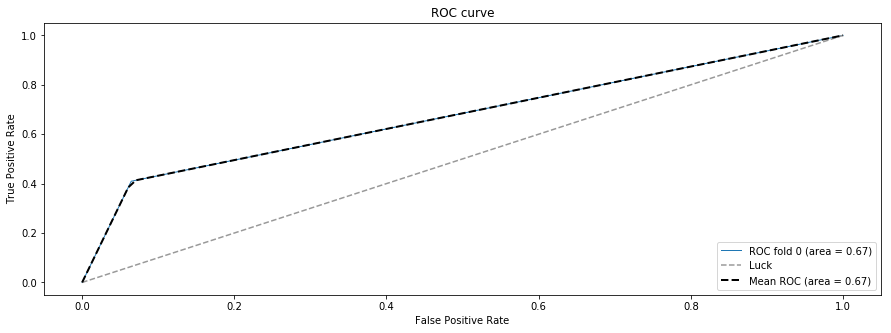

In [37]:
predicts = trained_clf_a.predict(x_test)
plots.plot_roc_curve(predicts, y_test)

> We have very low values compared to the AUCs from the Competition on this simple test.

We'll need to find better feature sets before messing with the classifiers

## Features

These features are based on the [Winners Features](https://www.kaggle.com/c/GiveMeSomeCredit/discussion/1166#7269).

There are results around .8 > with these set of features, it's a good start.

Compared to the dataset feature set (10 features), there are 80 features, a lot more to work on.

In [38]:
features_set = utils.load_features_set()
features_set.head()

,SeriousDlqin2yrs,UnknownNumberOfDependents,UnknownMonthlyIncome,NoDependents,NoIncome,ZeroDebtRatio,UnknownIncomeDebtRatio,WeirdRevolvingUtilization,ZeroRevolvingUtilization,LogDebt,...,LogDebtPer90DaysLate,LogUnknownIncomeDebtRatio,LogUnknownIncomeDebtRatioPerPerson,LogUnknownIncomeDebtRatioPerLine,LogUnknownIncomeDebtRatioPerRealEstateLine,LogUnknownIncomeDebtRatioPerDelinquency,LogUnknownIncomeDebtRatioPer90DaysLate,LogNumberRealEstateLoansOrLines,LowAge,Logage
0,1,0,0,0,0,0,0,0.0,0,8.898802,...,8.898802,0.0,-1.098612,-2.639057,-1.945910,-1.098612,0.000000,1.791759,0,3.332205
1,0,0,0,0,0,0,0,0.0,0,5.758517,...,5.758517,0.0,-0.693147,-1.609438,0.000000,0.000000,0.000000,0.000000,0,3.135494
2,0,0,0,1,0,0,0,0.0,0,5.556499,...,4.863352,0.0,0.000000,-1.098612,0.000000,-1.098612,-0.693147,0.000000,0,3.044522
3,0,0,0,1,0,0,0,0.0,0,4.778821,...,4.778821,0.0,0.000000,-1.791759,0.000000,0.000000,0.000000,0.000000,0,2.564949
4,0,0,0,1,0,0,0,0.0,0,7.368324,...,7.368324,0.0,0.000000,-2.079442,-0.693147,-0.693147,0.000000,0.000000,0,3.465736


In [39]:
y = features_set['SeriousDlqin2yrs'].as_matrix()
x = features_set.drop(['SeriousDlqin2yrs'], axis=1).as_matrix()

In [40]:
x_train, x_test, y_train, y_test = utils.split_dataset(x, y)

Dataset splitted from: 
	x=(150000, 80), y=(150000,)
To: 
Train Set
	x=(100500, 80), y=(100500,)
Test Set
	x=(49500, 80), y=(49500,)


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_C = LogisticRegression()

print("First")
trained_clf_a = utils.train_predict(clf_A, x_train, y_train, x_test, y_test)

print("Second")
trained_clf_b = utils.train_predict(clf_C, x_train, y_train, x_test, y_test)

First
Training a GaussianNB using a training set size of 100500. . .
Trained model in 0.1484 seconds
Made predictions in 0.1507 seconds.
Made predictions in 0.0344 seconds.
F1 score for training set: 0.4086, and AUC 0.6997
F1 score for test set: 0.4113 and AUC 0.7013.
Second
Training a LogisticRegression using a training set size of 100500. . .
Trained model in 6.8313 seconds
Made predictions in 0.0068 seconds.
Made predictions in 0.0038 seconds.
F1 score for training set: 0.2175, and AUC 0.5635
F1 score for test set: 0.2372 and AUC 0.5705.


> Seems like a good start, yet there were results with .8 AUC in the Test Set on the Competition.

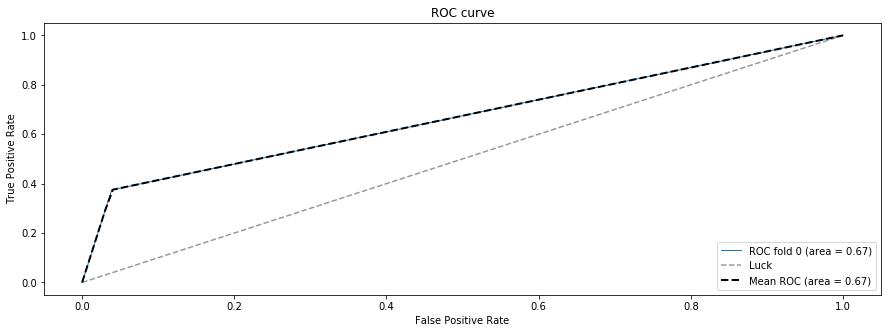

In [42]:
predicts = trained_clf_a.predict(x_test)
plots.plot_roc_curve(predicts, y_test)

## Algorithm Selection and Validation Selection

According to the Survey on the Competition Forum the Algorithms used were:

* [XGBooost](https://www.kaggle.com/c/GiveMeSomeCredit/discussion/31514)
* [AdaBoost, GradBoost, KNN, Logistic, and RandomForest](https://www.kaggle.com/c/GiveMeSomeCredit/discussion/23179)

As for I'm a Neural Network Fanboy I would like to try using a 1d RNN

The validation would be a simple Strat-K-FoldCV